In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

from module import MlfcsTrainer
import metrics
mypalette = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#7f7f7f','#bcbd22','#17becf']
palette = ['#ffffff','#bc8977','#719b78','#6a73a4']

Initializing module with the trained dataset

In [2]:
Module = joblib.load('../data/model_trained')

FileNotFoundError: [Errno 2] No such file or directory: '../data/model_trained.pk'

In [ ]:
#Compute your test set containing only wx = 250 and w=500
data_test = pd.read_pickle('../data/test_set_git')
res = Module.test(data_test)

Test sur  8  cores


/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/fitter.py:39: RuntimeWarning: divide by zero encountered in divide
  signal = signal/signal[:5].mean()
/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/fitter.py:39: RuntimeWarning: invalid value encountered in divide
  signal = signal/signal[:5].mean()
/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/fitter.py:39: RuntimeWarning: divide by zero encountered in divide
  signal = signal/signal[:5].mean()
/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/fitter.py:39: RuntimeWarning: invalid value encountered in divide
  signal = signal/signal[:5].mean()
/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/fitter.py:39: RuntimeWarning: divide by zero encountered in divide
  signal = signal/signal[:5].mean()
/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/fitter.py:39: RuntimeWarning: invalid value encountered in divide
  signal = signal/signal[:5].mean()
/

Figure 2 : MAE as function of observation time

In [ ]:
Data = res

#Parameters taken for the analysis
omegas = [500]
omegas_x = [250]
time_list = [0.25, 0.5, 0.75, 1.0, 1.25 , 1.50, 2.0]
models = ['MB','CTRW','FBM']

fig = metrics.return_mae(Data, omegas,omegas_x,time_list,models)

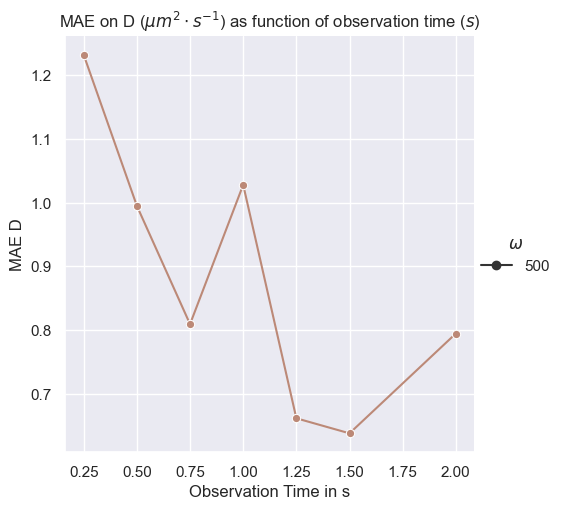

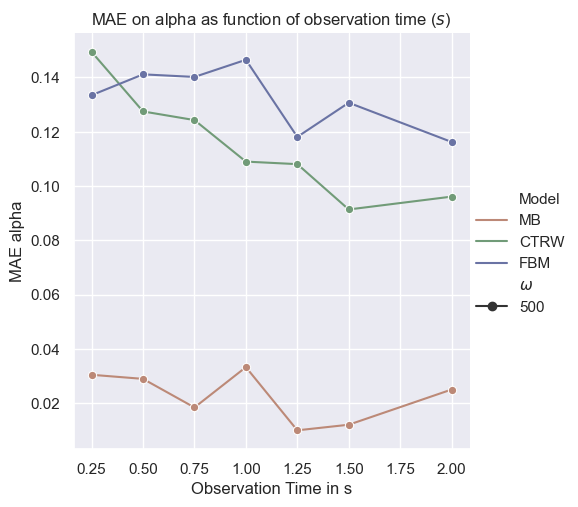

In [ ]:
sns.set_theme()

#MAE D
# D follows a uniform law on [0,10]
sns.set_palette(palette[1:])
maeD = sns.relplot(
    data=fig.loc[fig['Model']=='MB'],
    x = 'Time window' , y = 'MAE D', style = '$\omega$',
    markers = "o", kind = "line"
)
maeD.set(title = 'MAE on D ($\mu m^2 \cdot s^{-1}$) as function of observation time ($s$)')
maeD.set_xlabels('Observation Time in s')
plt.show()
maeD.savefig('../fig/mae_D.pdf',dpi=300)

#MAE alpha
#alpha follows a uniform law on [0,1] when fBm, CTRW
sns.set_palette(palette[1:])
maealpha = sns.relplot(
    data=fig,
    x = 'Time window' , y = 'MAE alpha',style = '$\omega$',hue ='Model',
    markers = "o", kind = "line"
)
maealpha.set(title = 'MAE on alpha as function of observation time ($s$)')
maealpha.set_xlabels('Observation Time in s')
plt.show()

In [ ]:
omegas = [500]
omegas_x = [250]
time_list = [0.1,0.25, 0.5, 0.75, 1.0, 1.25 , 1.50, 2.0]
models = ['MB','CTRW','FBM']

fig = metrics.return_f1(Data, omegas,omegas_x,time_list,models)

Figure 2 : F1 Score function of observation time

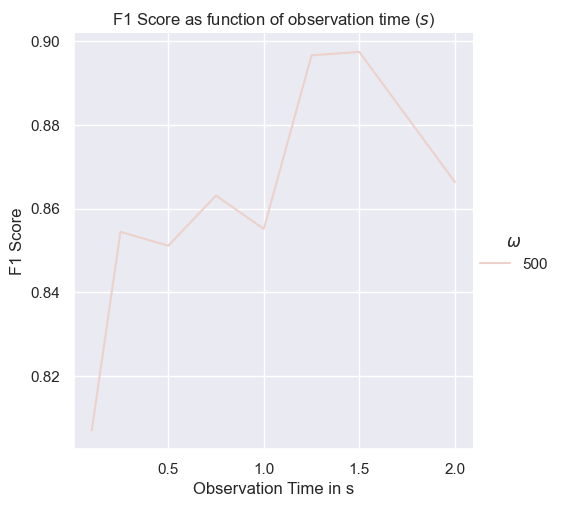

In [ ]:
f1score = sns.relplot(
    data=fig,
    x = 'Time window' , y = 'F1 Score',hue = '$\omega$',
    markers = "o", kind = "line"
)
f1score.set(title = 'F1 Score as function of observation time ($s$)')
f1score.set_xlabels('Observation Time in s')
plt.show()

Figure 3 : MAE alpha et D 

In [ ]:
#The prediction on test set
Data = res
omegas = [500]
omegas_x = [250]
time_list = [0.25, 0.5, 0.75, 1.0, 1.25 , 1.50, 2.0]
fig = metrics.return_mae_fit_ml(Data, omegas,omegas_x,time_list,models)

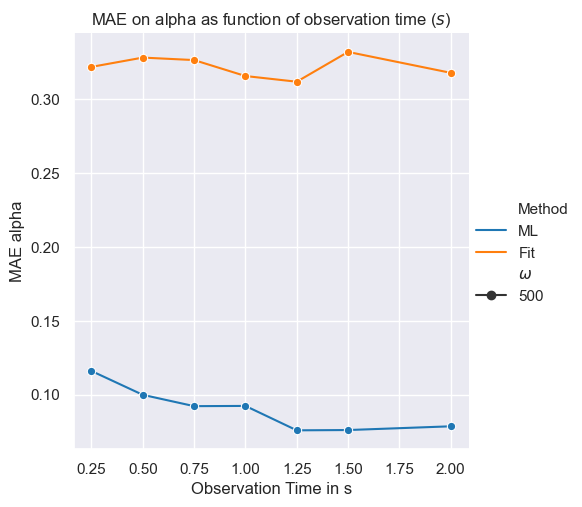

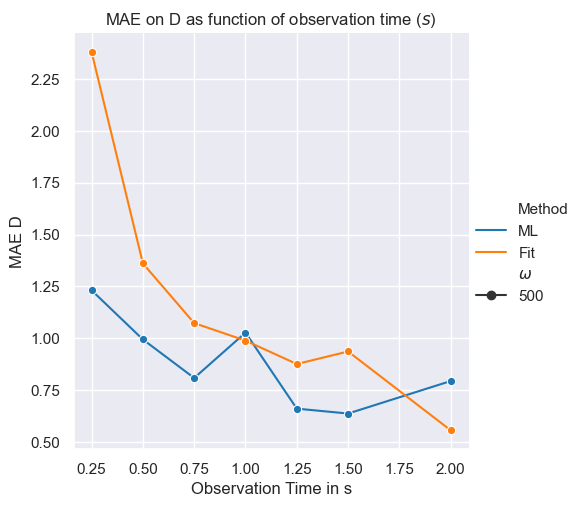

In [ ]:

fig['$\omega$']=fig['omega']

sns.set_theme()
sns.set_palette(mypalette)
maealphavsfit = sns.relplot(
    data=fig,
    x = 'Time window' , y = 'MAE alpha',hue ='Method',style = '$\omega$',
    markers = "o", kind = "line"
)
maealphavsfit.set(title = 'MAE on alpha as function of observation time ($s$)')
maealphavsfit.set_xlabels('Observation Time in s')
plt.show()

maeDvsfit = sns.relplot(
    data=fig,
    x = 'Time window' , y = 'MAE D',hue ='Method',style = '$\omega$',
    markers = "o", kind = "line"
)
maeDvsfit.set(title = 'MAE on D as function of observation time ($s$)')
maeDvsfit.set_xlabels('Observation Time in s')
plt.show()